In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

import warnings
warnings.filterwarnings('ignore')

# Import

In [44]:
churnData=pd.read_csv("data/DATA_Customer-Churn.csv")

In [45]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [46]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [47]:
churnData["TotalCharges"]=pd.to_numeric(churnData["TotalCharges"],errors='coerce')
churnData.loc[:, churnData.isnull().any()].columns

Index(['TotalCharges'], dtype='object')

In [48]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [49]:
churnData["TotalCharges"]=churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())

In [50]:
t=churnData[["TotalCharges"]]
te=churnData[["tenure"]]
m=churnData[["MonthlyCharges"]]
s=churnData[["SeniorCitizen"]]

In [51]:
X=pd.concat([t,te,m,s],axis=1)

In [52]:
y = churnData[["Churn"]]

# Balance data 

In [53]:
X_y=pd.concat([X,y],axis=1)
X_y

,TotalCharges,tenure,MonthlyCharges,SeniorCitizen,Churn
0,29.85,1,29.85,0,No
1,1889.50,34,56.95,0,No
2,108.15,2,53.85,0,Yes
3,1840.75,45,42.30,0,No
4,151.65,2,70.70,0,Yes
...,...,...,...,...,...
7038,1990.50,24,84.80,0,No
7039,7362.90,72,103.20,0,No
7040,346.45,11,29.60,0,No
7041,306.60,4,74.40,1,Yes


In [54]:
X_y['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [55]:
5174/len(X_y['Churn']) # 73% is category no

0.7346301292063041

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [57]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
No       5174
Yes      5174
dtype: int64

In [58]:
X_sm

,TotalCharges,tenure,MonthlyCharges,SeniorCitizen
0,29.850000,1,29.850000,0
1,1889.500000,34,56.950000,0
2,108.150000,2,53.850000,0
3,1840.750000,45,42.300000,0
4,151.650000,2,70.700000,0
...,...,...,...,...
10343,141.968238,2,75.375280,0
10344,4118.664921,40,100.887371,0
10345,1625.176432,17,93.881959,0
10346,2185.970659,26,82.974782,0


# Scale balanced data

In [59]:
scaler = StandardScaler()
X_sm_scaled = scaler.fit_transform(X_sm)
X_sm_scaled

array([[-0.92255675, -1.10897808, -1.33883389, -0.40092434],
       [-0.0713441 ,  0.26616134, -0.39246831, -0.40092434],
       [-0.8867167 , -1.06730719, -0.50072415, -0.40092434],
       ...,
       [-0.19233222, -0.44224382,  0.89724145, -0.40092434],
       [ 0.06435863, -0.06720579,  0.51634931, -0.40092434],
       [ 0.20726058,  0.34950313, -0.06097073, -0.40092434]])

## Train - Test balanced split

In [60]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm_scaled, y_sm, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train_sm = pd.DataFrame(X_train_sm, columns= X.columns)

In [61]:
X_test_sm

array([[-0.87275786, -1.06730719,  0.08317233, -0.40092434],
       [-0.82348167, -0.69226917, -1.67233173, -0.40092434],
       [ 1.47627783,  1.18292096,  1.04104855, -0.40092434],
       ...,
       [-0.91994771, -1.10897808, -1.13978283, -0.40092434],
       [-0.915256  , -1.10897808, -0.78184013, -0.40092434],
       [ 0.9122523 ,  0.80788294,  0.56619116, -0.40092434]])

# Scale unbalanced data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.99497138, -1.27744458, -1.16032292, -0.43991649],
       [-0.17387565,  0.06632742, -0.25962894, -0.43991649],
       [-0.96039939, -1.23672422, -0.36266036, -0.43991649],
       ...,
       [-0.85518222, -0.87024095, -1.1686319 , -0.43991649],
       [-0.87277729, -1.15528349,  0.32033821,  2.27315869],
       [ 2.01391739,  1.36937906,  1.35896134, -0.43991649]])

## Train-Test Split unblanced


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)


In [64]:
X_train

,TotalCharges,tenure,MonthlyCharges,SeniorCitizen
0,-4.179106e-01,-0.463037,0.002935,-0.439916
1,1.256667e+00,0.880735,1.078118,-0.439916
2,-9.977972e-01,-1.277445,-1.373033,-0.439916
3,-9.030885e-01,-1.155283,0.180747,-0.439916
4,1.807071e-15,-1.318165,-0.095111,-0.439916
...,...,...,...,...
5629,-9.662055e-01,-1.277445,1.004999,-0.439916
5630,-3.753045e-02,-0.381597,0.875378,-0.439916
5631,-8.730201e-01,-0.829521,-1.449476,-0.439916
5632,-4.782460e-01,-0.829521,1.152899,2.273159


# Round 1

## Logistic Regression

### Logistic Regression unbalanced

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


Confusion matrix for the train set
[[3774  364]
 [ 833  663]]


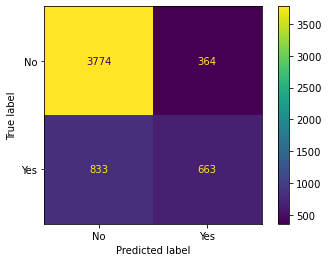



Confusion matrix for the test set
[[959  77]
 [194 179]]


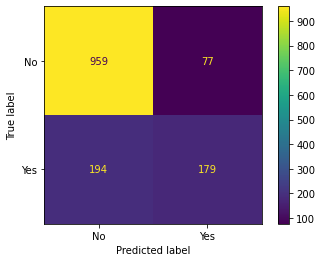

In [65]:
log_model = LogisticRegression() 
log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

In [66]:
scores=cross_val_score(log_model, X_train, y_train, cv=5)
scores.mean()

0.7871834717360573

### Logistic Regression balanced

,Error_metric,Train,Test
0,Accuracy,0.727470,0.743478
1,Precision,0.723725,0.747137
2,Recall,0.732848,0.746425


Confusion matrix for the train set
[[2999 1154]
 [1102 3023]]


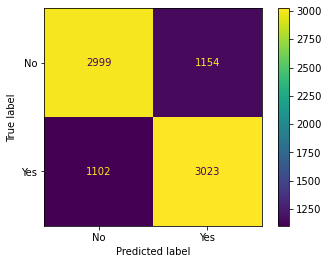



Confusion matrix for the test set
[[756 265]
 [266 783]]


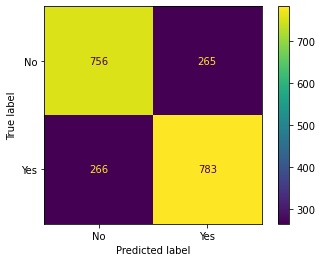

In [67]:
log_model_2 = LogisticRegression() 
log_model_2.fit(X_train_sm, y_train_sm)

y_pred_train_log_sm = log_model_2.predict(X_train_sm)
y_pred_test_log_sm = log_model_2.predict(X_test_sm)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_log_sm),
                                         precision_score(y_train_sm, y_pred_train_log_sm,pos_label="Yes"),
                                         recall_score(y_train_sm, y_pred_train_log_sm,pos_label="Yes")],
                               'Test': [accuracy_score(y_test_sm, y_pred_test_log_sm),
                                        precision_score(y_test_sm, y_pred_test_log_sm,pos_label="Yes"),
                                        recall_score(y_test_sm, y_pred_test_log_sm,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_sm,y_pred_train_log_sm))
plot_confusion_matrix(log_model_2,X_train_sm,y_train_sm, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_sm, y_pred_test_log_sm))
plot_confusion_matrix(log_model_2,X_test_sm,y_test_sm, values_format = 'd')
plt.show()

In [68]:
scores=cross_val_score(log_model_2, X_train_sm, y_train_sm, cv=5)
scores

array([0.73913043, 0.70652174, 0.73309179, 0.71601208, 0.74320242])

In [69]:
mean_scr=scores.mean()
mean_scr

0.7275916925726461

## KNN Regressor
### KNN Regressor unbalanced

,Error_metric,Train,Test
0,Accuracy,0.837416,0.773598
1,Precision,0.741265,0.585443
2,Recall,0.595588,0.495979


Confusion matrix for the train set
[[3827  311]
 [ 605  891]]


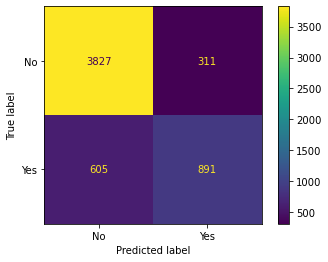



Confusion matrix for the test set
[[905 131]
 [188 185]]


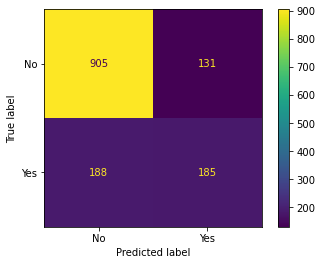

In [70]:
# initialize model (set parameters)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance


# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)



performance= pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test,y_pred_test_knn,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn,pos_label="Yes")]})

display(performance)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test,y_test, values_format = 'd')
plt.show()

### KNN Regressor balanced

,Error_metric,Train,Test
0,Accuracy,0.827978,0.759903
1,Precision,0.814729,0.757463
2,Recall,0.847515,0.774071


Confusion matrix for the train set
[[3358  795]
 [ 629 3496]]


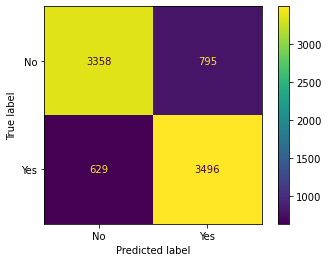



Confusion matrix for the test set
[[761 260]
 [237 812]]


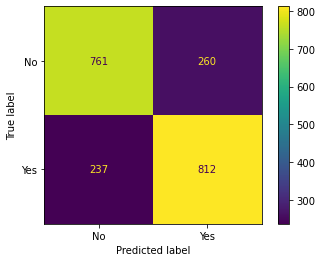

In [71]:
# initialize model (set parameters)
neigh_2 = KNeighborsClassifier(n_neighbors=5)
neigh_2.fit(X_train_sm, y_train_sm) # Minkowski distance with p = 2 -> Euclidean distance


# make predictions
y_pred_train_knn_sm = neigh_2.predict(X_train_sm)
y_pred_test_knn_sm  = neigh_2.predict(X_test_sm)



performance= pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_knn_sm),
                                         precision_score(y_train_sm, y_pred_train_knn_sm,pos_label="Yes"),
                                         recall_score(y_train_sm, y_pred_train_knn_sm,pos_label="Yes")],
                               'Test': [accuracy_score(y_test_sm, y_pred_test_knn_sm),
                                        precision_score(y_test_sm,y_pred_test_knn_sm,pos_label="Yes"),
                                        recall_score(y_test_sm, y_pred_test_knn_sm,pos_label="Yes")]})

display(performance)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_sm,y_pred_train_knn_sm))
plot_confusion_matrix(neigh_2,X_train_sm,y_train_sm, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_sm, y_pred_test_knn_sm))
plot_confusion_matrix(neigh_2,X_test_sm,y_test_sm, values_format = 'd')
plt.show()

In [72]:
scores=cross_val_score(neigh_2, X_train_sm, y_train_sm, cv=5)
scores
scores.mean()

0.7522345549279741

# Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data

## Decision Tree unbalanced

,Error_metric,Train,Test
0,Accuracy,0.795172,0.790632
1,Precision,0.675565,0.657258
2,Recall,0.439840,0.436997


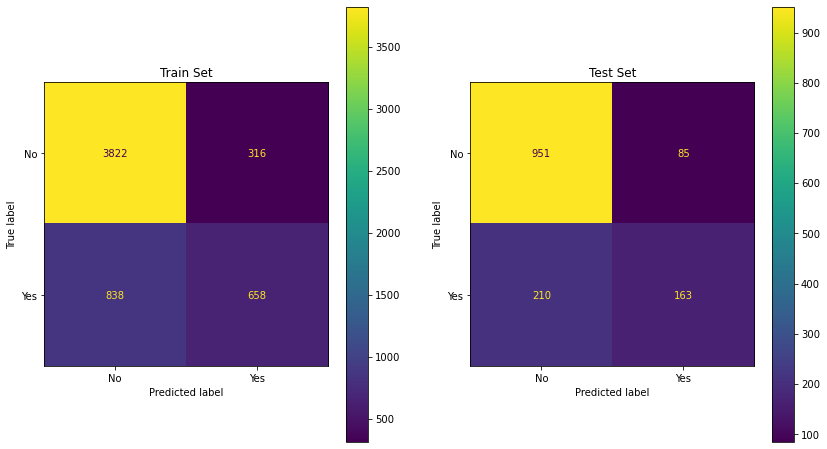

In [73]:
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt,pos_label="Yes")]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

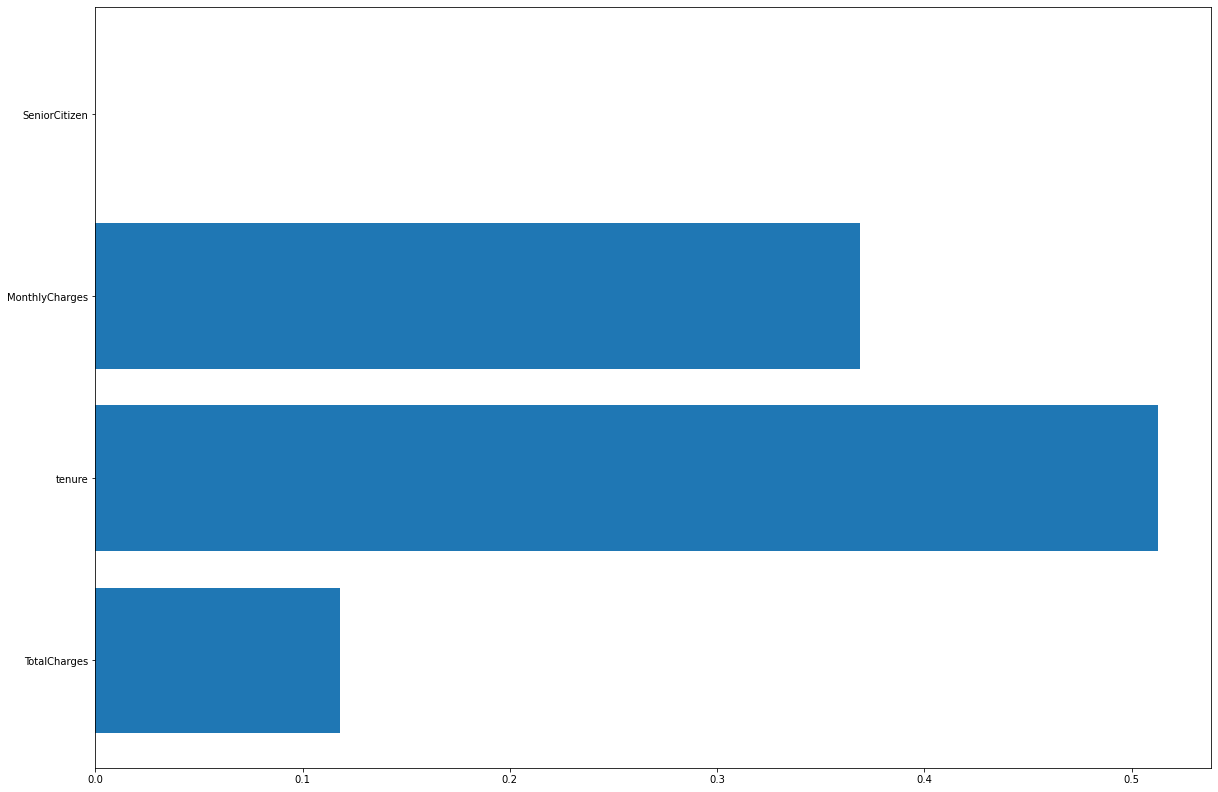

In [74]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)


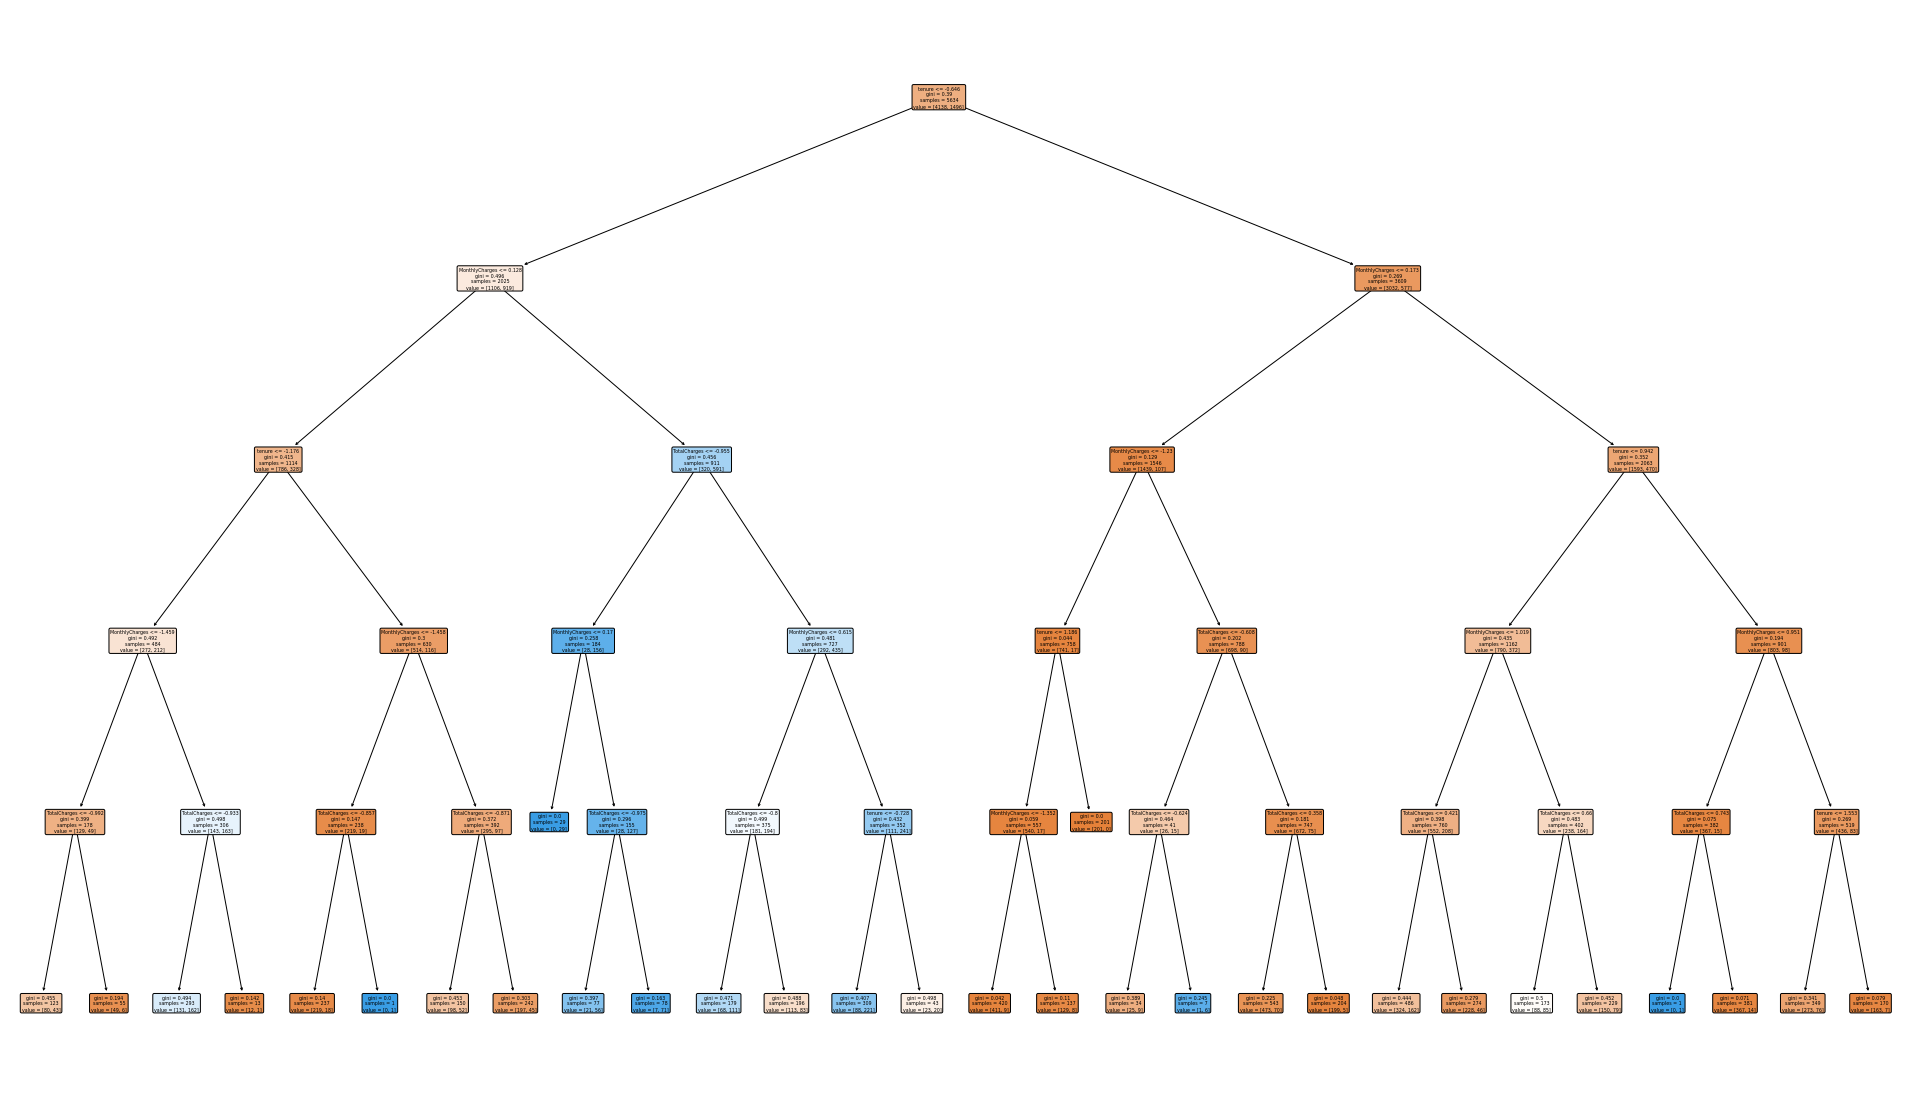

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(model,filled = True, rounded=True,feature_names=X.columns)

plt.show() 

In [76]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores
scores.mean()

0.7864737801831676

### Decision Tree  balanced

,Error_metric,Train,Test
0,Accuracy,0.756221,0.744444
1,Precision,0.739704,0.732975
2,Recall,0.788121,0.779790


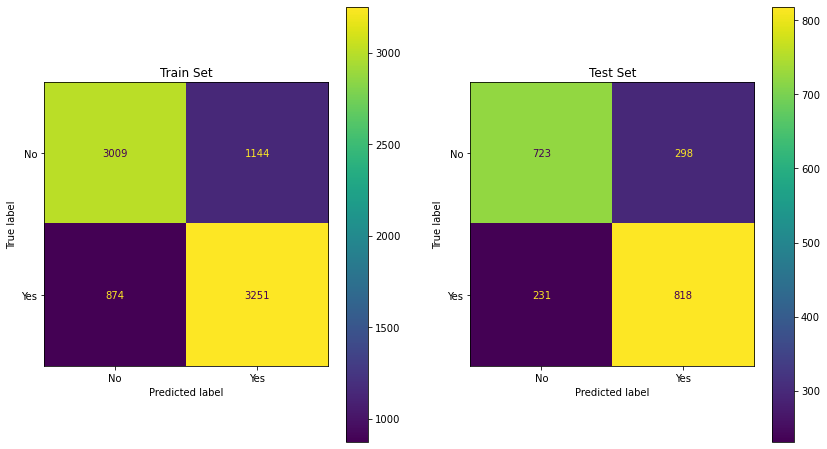

In [77]:
model_2 = DecisionTreeClassifier(max_depth=5)

model_2.fit(X_train_sm, y_train_sm)

y_pred_train_dt_sm = model_2.predict(X_train_sm)
y_pred_test_dt_sm = model_2.predict(X_test_sm)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_dt_sm),
                                         precision_score(y_train_sm, y_pred_train_dt_sm,pos_label="Yes"),
                                         recall_score(y_train_sm, y_pred_train_dt_sm,pos_label="Yes")],
                               'Test': [accuracy_score(y_test_sm, y_pred_test_dt_sm),
                                        precision_score(y_test_sm, y_pred_test_dt_sm,pos_label="Yes"),
                                        recall_score(y_test_sm, y_pred_test_dt_sm,pos_label="Yes")]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model_2,X_train_sm,y_train_sm,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model_2,X_test_sm,y_test_sm,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

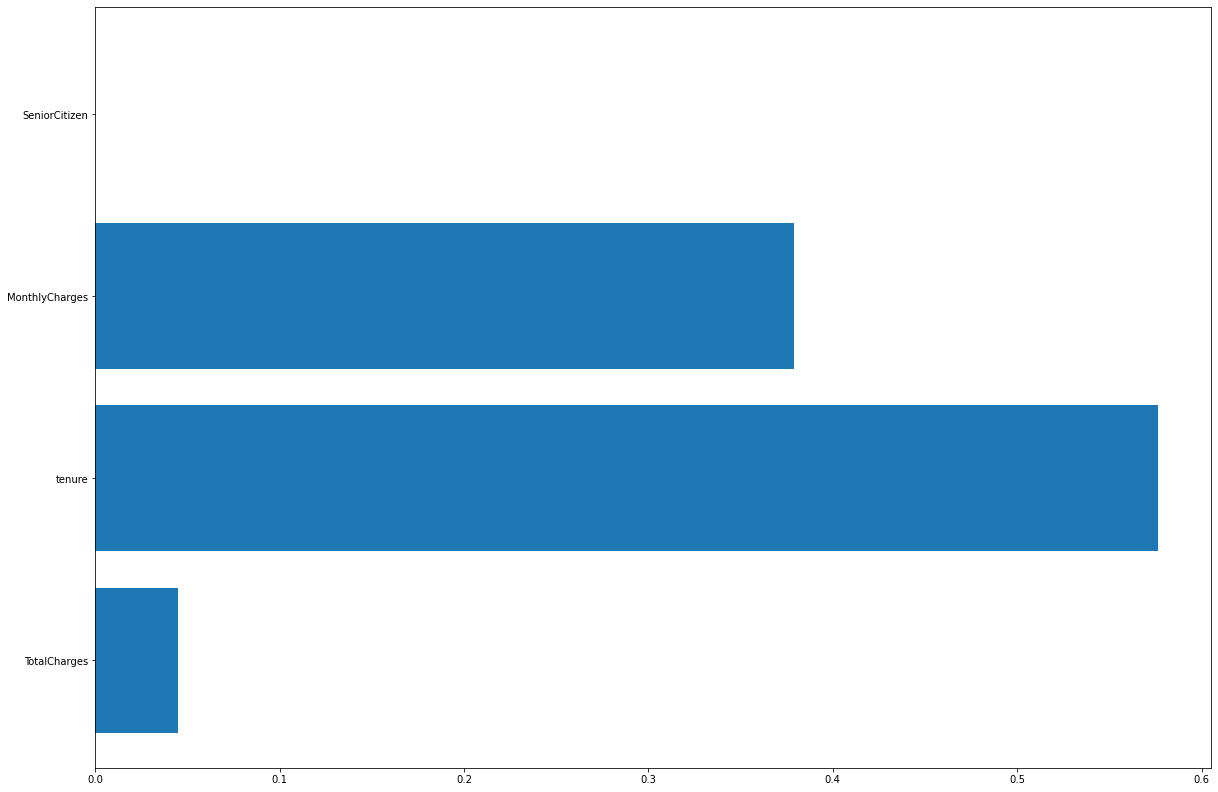

In [78]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model_2.feature_importances_)


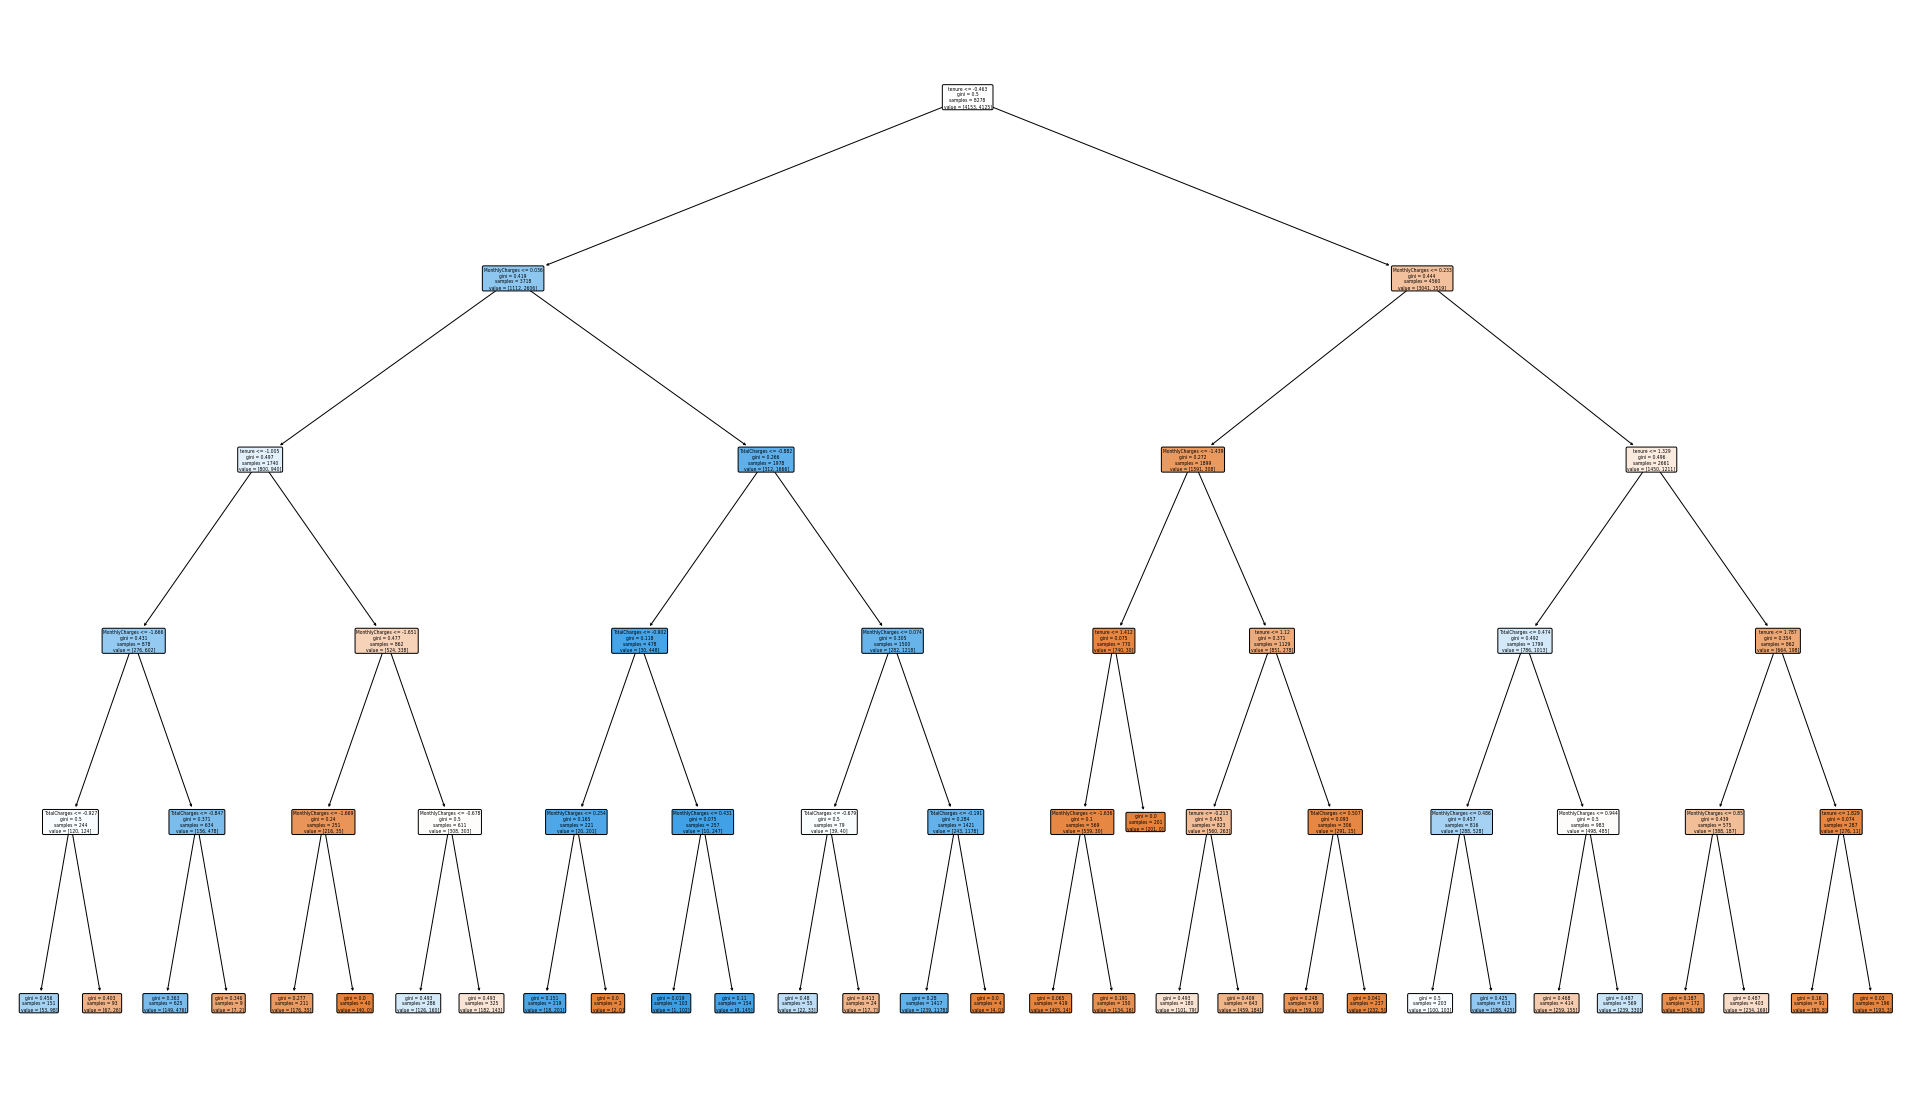

In [79]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(model_2,filled = True, rounded=True,feature_names=X.columns)

plt.show() 

# Round 4

fit a Random forest Classifier on the data and compare the accuracy.
tune the hyper paramters with gridsearch and check the results.

In [81]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [84]:
numericalX = churnData.select_dtypes(np.number)
categoricalX = churnData.select_dtypes(np.object)

In [85]:
categoricalX

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [86]:
y= categoricalX["Churn"]

In [91]:
categoricalX.drop(columns=["Churn"])

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [92]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [93]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [96]:
X_sm

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,1,29.850000,29.850000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0,34,56.950000,1889.500000,1.000000,0.000000,0.000000,1.0,0.0,1.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
2,0,2,53.850000,108.150000,1.000000,0.000000,0.000000,1.0,0.0,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
3,0,45,42.300000,1840.750000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,...,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
4,0,2,70.700000,151.650000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,35,101.753322,3563.813965,0.530951,0.000000,0.000000,1.0,0.0,0.000000,...,0.530951,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,1.0
10344,0,1,89.362404,89.362404,1.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,1.0
10345,0,1,90.550000,90.550000,0.970142,0.000000,0.000000,1.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,1.0
10346,0,1,55.176295,55.176295,0.000000,0.881477,0.000000,1.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.0


In [97]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_sm, y_sm, test_size=0.25, random_state=0)

In [99]:
clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train_rf, y_train_rf)
print(clf.score(X_train_rf, y_train_rf))
print(clf.score(X_test_rf, y_test_rf))

1.0
1.0


In [101]:
clf.predict_proba(X_test_rf)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

## Hyper Parameter Tuning 

In [107]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    ##'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [108]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [109]:
grid_search.fit(X_train_rf,y_train_rf)

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wi

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wi

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wi

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wi

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wi

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wi

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [106]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}